In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

l = pd.read_csv('automobile-losses.csv')
r = pd.read_csv('automobile-risk.csv')
s = pd.read_csv('automobile-spec.csv')


# PART 1
## 1. Join 3 tables using ID as key

In [88]:
join1 = pd.merge(l,r,how='left',on='ID')
data = pd.merge(join1,s,how='left',on='ID')
data.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 2. Quick-look (dimension, data type, head/tail, summary statistics, etc)

In [42]:
data.shape

(205, 27)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [48]:
data.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [49]:
data.tail()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,95.0,-1,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [44]:
data.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [51]:
data.columns

Index(['ID', 'normalized-losses', 'symboling', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'cylinder', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# 3. Identify missing value. If any, how will you handle it?

In [47]:
#count how many missing values per field
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
wheel-base            0
symboling             0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheel           0
engine-loc            0
height                0
length                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
ID                    0
dtype: int64

In [101]:
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
data['price'] = data['price'].fillna(data['price'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())
data['bore'] = data['bore'].fillna(data['bore'].mean())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode().values[0])
data.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [102]:
#count how many missing values per field
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
height               0
highway-mpg          0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
ID                   0
dtype: int64

In [105]:
kategorik=['make', 'fuel-type','aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc','engine-type',
       'cylinder', 'fuel-system']
numerical=data.drop(kategorik,axis=1)
categorical=data[kategorik]
numerical.head()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#create correlation with hitmap

#create correlation
corr = numerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

# 4. Perform visualization using at least 5 difference visualization technique

Text(0.5,1,'BARPLOT fuel-system VS price')

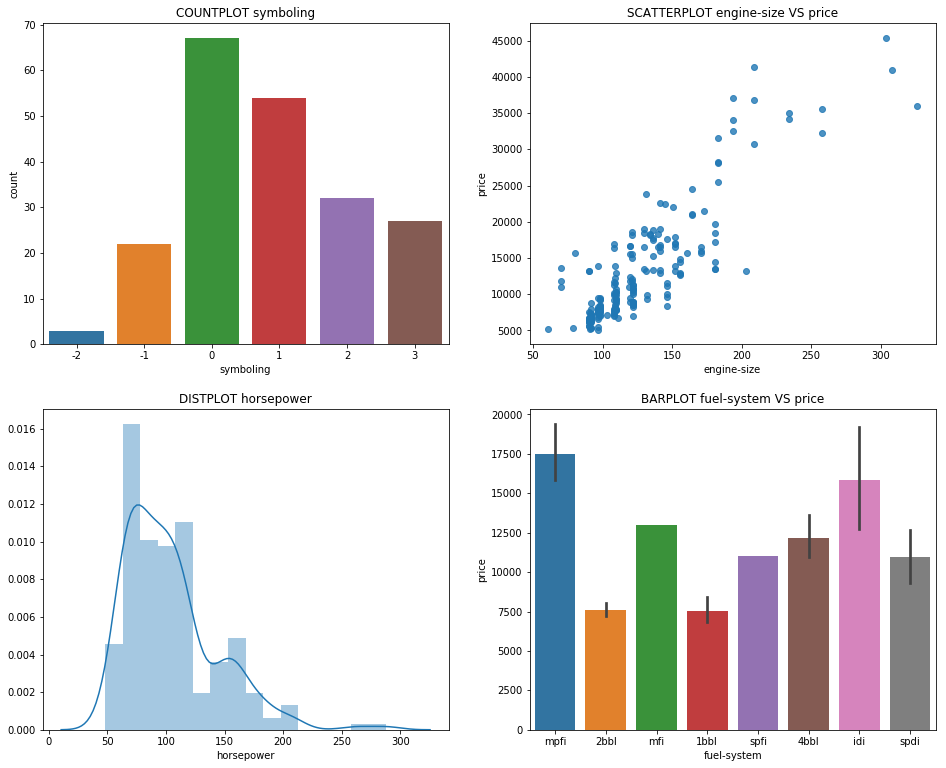

In [155]:
f=plt.figure(figsize=(16,13))
f.add_subplot(2,2,1)
#countlot
sns.countplot(numerical['symboling']).set_title('COUNTPLOT symboling')
f.add_subplot(2,2,2)
#scatterplot
sns.regplot(data['engine-size'],data['price'],fit_reg=False).set_title('SCATTERPLOT engine-size VS price')
f.add_subplot(2,2,3)
#distplot
sns.distplot(numerical['horsepower']).set_title('DISTPLOT horsepower')
f.add_subplot(2,2,4)
#barplot
sns.barplot(x="fuel-system", y="price", data=data).set_title('BARPLOT fuel-system VS price')




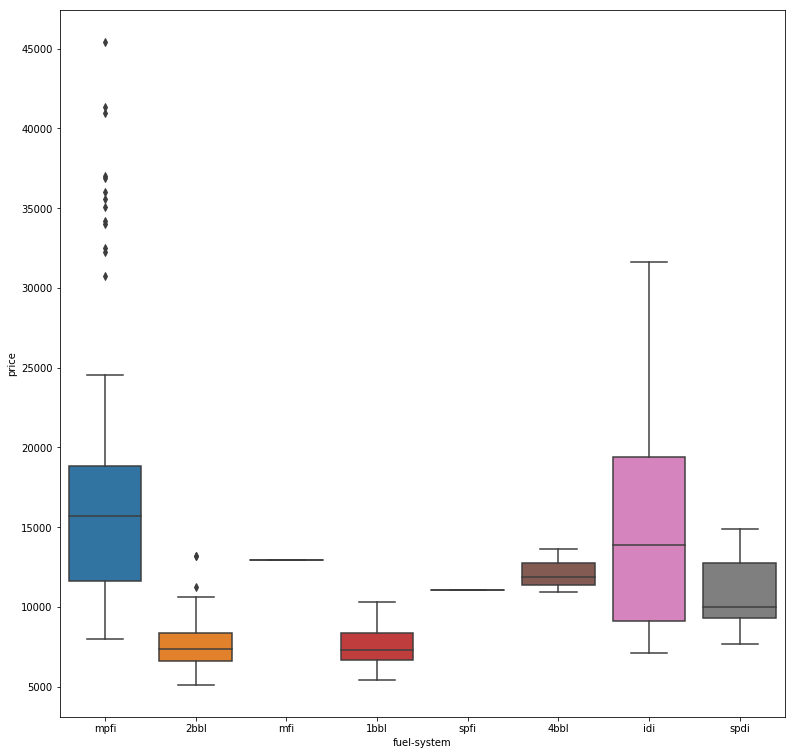

In [153]:
#boxplot
plt.figure(figsize=(13,13))
sns.boxplot(y=data["price"], x=data['fuel-system'])

# PART 2
# 1. Car brand with highest price

In [122]:
best = data.loc[(data.horsepower >= 0)&(data.horsepower <= 100000)]
net_best = best.sort_values('price', ascending = False)
net_best['make'].head(1)

74    mercedes-benz
Name: make, dtype: object

# 2. Maximum horsepower for car with 6 cylinder engine

In [128]:
best2 = data.loc[(data.cylinder == 'six')]
net_best2 = best.sort_values('horsepower', ascending = False)
net_best2['horsepower'].head(1)

129    288.0
Name: horsepower, dtype: float64

# 3. Average peak-rpm for ‘turbo’ style aspiration car

In [127]:
best3 = data.loc[(data.aspiration == 'turbo')]
net_best3 = best['peak-rpm'].mean()
net_best3

5125.369458128079

# 4. Average price based on body-style

In [133]:
best4_group = data.groupby('body-style')
best4__mean = best4_group['price'].mean()
print(best4__mean)

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback      10050.289410
sedan          14433.658945
wagon          12371.960000
Name: price, dtype: float64


# 5. Average price based on body-style only for Honda car (make=Honda)

In [147]:
best5_loc = data.loc[(data.make == 'honda')]
best5_group = best5_loc.groupby('body-style')
best5__mean = best5_group['price'].mean()
print(best5__mean)

body-style
hatchback    7054.428571
sedan        9945.000000
wagon        7295.000000
Name: price, dtype: float64
